In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("TDS_Water_Dataset (1).csv")

In [3]:
df.head(11)

,Date,TDS (ppm)
0,2024-08-22,650.000000
1,2024-08-22,397.234714
2,2024-08-22,412.953771
3,2024-08-22,430.460597
4,2024-08-22,395.316933
5,2024-08-22,395.317261
6,2024-08-23,431.584256
7,2024-08-23,415.348695
8,2024-08-23,390.610512
9,2024-08-23,410.851201


In [4]:
df.isnull()

,Date,TDS (ppm)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


In [5]:
df.shape

(100, 2)

In [6]:
df.columns

Index(['Date', 'TDS (ppm)'], dtype='object')

In [7]:
count= len(df['TDS (ppm)'])


In [8]:
print(f"The total number of enties in the data set are {count}.")

The total number of enties in the data set are 100.


In [9]:
df.describe()

,TDS (ppm)
count,100.000000
mean,404.022673
std,62.980424
min,200.000000
25%,386.938594
50%,397.460874
75%,408.201807
max,800.000000


In [10]:
from scipy.stats import gmean

In [11]:
gmean(df["TDS (ppm)"])

400.1466169319973

In [12]:
df["TDS (ppm)"].median()

397.4608741644057

In [13]:
a= df["TDS (ppm)"].mode()
print(a)

0     200.000000
1     300.000000
2     347.605098
3     360.248622
4     360.806598
         ...    
95    431.584256
96    437.045564
97    650.000000
98    700.000000
99    800.000000
Name: TDS (ppm), Length: 100, dtype: float64


In [14]:
df.sort_values(by="TDS (ppm)")

,Date,TDS (ppm)
80,2024-09-04,200.000000
40,2024-08-28,300.000000
74,2024-09-03,347.605098
79,2024-09-04,360.248622
37,2024-08-28,360.806598
...,...,...
6,2024-08-23,431.584256
31,2024-08-27,437.045564
0,2024-08-22,650.000000
20,2024-08-25,700.000000


In [15]:
range_df = df["TDS (ppm)"].max() - df["TDS (ppm)"].min()
print(range_df)

600.0


In [16]:
sample_variance= df["TDS (ppm)"].var()

In [17]:
sample_standard_deviation= df["TDS (ppm)"].std()

In [18]:
df_mean=df["TDS (ppm)"].mean()

In [19]:
coefficient_of_variation= sample_standard_deviation /df_mean

In [20]:
print(f"sample variance = {sample_variance}")
print(f"sample standard deviation = {sample_standard_deviation}")
print(f"coefficient of variation = {coefficient_of_variation}")

sample variance = 3966.5337659605316
sample standard deviation = 62.9804236724439
coefficient of variation = 0.155883389435547


In [21]:
from scipy import stats

In [22]:
first_decile = np.percentile(df["TDS (ppm)"], 10)        
twenty_first_percentile = np.percentile(df["TDS (ppm)"], 21) 
first_quartile = np.percentile(df["TDS (ppm)"], 25)      
second_quartile = np.percentile(df["TDS (ppm)"], 50)     
third_quartile = np.percentile(df["TDS (ppm)"], 75)      
IQR = third_quartile - first_quartile


In [23]:
print(f"First Decile: {first_decile}")
print(f"21st Percentile: {twenty_first_percentile}")
print(f"First Quartile (Q1): {first_quartile}")
print(f"Second Quartile (Q2): {second_quartile}")
print(f"Third Quartile (Q3): {third_quartile}")
print(f"IQR: {IQR}")

First Decile: 371.4275027518936
21st Percentile: 383.7010874767525
First Quartile (Q1): 386.9385936793933
Second Quartile (Q2): 397.4608741644057
Third Quartile (Q3): 408.2018074407519
IQR: 21.2632137613586


In [24]:
df.describe()

,TDS (ppm)
count,100.000000
mean,404.022673
std,62.980424
min,200.000000
25%,386.938594
50%,397.460874
75%,408.201807
max,800.000000


In [25]:
bins = [100,200, 300, 400, 500, 600, 700, 800]

frequency, class_intervals = np.histogram(df["TDS (ppm)"], bins=bins)

df2 = pd.DataFrame({
    'Class Interval': [f"{class_intervals[i]} - {class_intervals[i+1]}" for i in range(len(class_intervals)-1)],
    'Frequency': frequency
})

df2['Relative Frequency'] = df2['Frequency'] / df2['Frequency'].sum()

df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()


In [26]:
print(df2)

  Class Interval  Frequency  Relative Frequency  Cumulative Relative Frequency
0      100 - 200          0                0.00                           0.00
1      200 - 300          1                0.01                           0.01
2      300 - 400         53                0.53                           0.54
3      400 - 500         43                0.43                           0.97
4      500 - 600          0                0.00                           0.97
5      600 - 700          1                0.01                           0.98
6      700 - 800          2                0.02                           1.00


In [27]:
import matplotlib.pyplot as plt

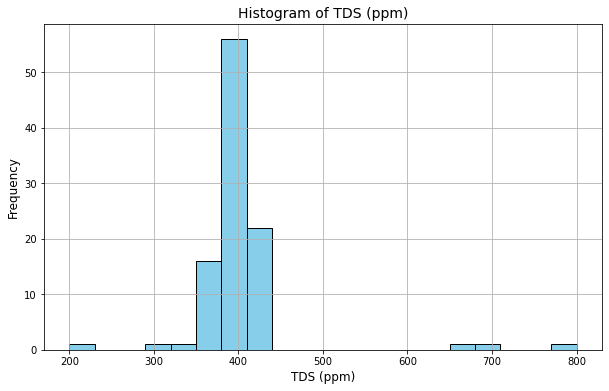

In [28]:
#Histogarm
plt.figure(figsize=(10, 6))
plt.hist(df["TDS (ppm)"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

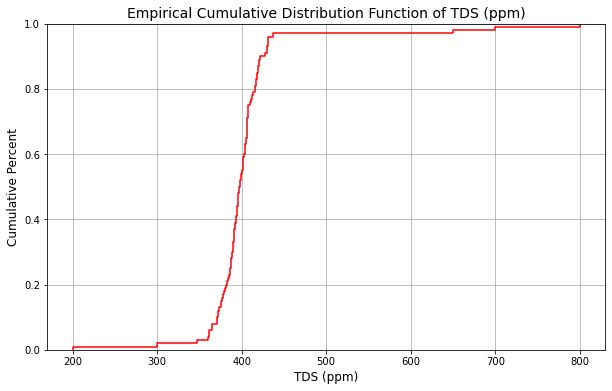

In [29]:
#Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(10, 6))
sns.ecdfplot(df["TDS (ppm)"], color='red')
plt.title('Empirical Cumulative Distribution Function of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Cumulative Percent', fontsize=12)
plt.grid(True)
plt.show()

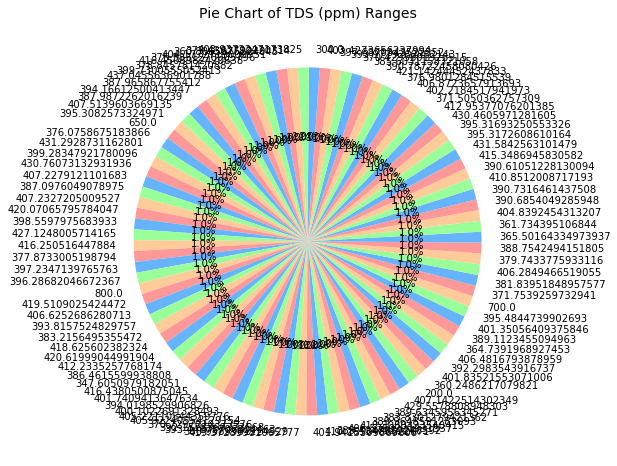

In [30]:
#Pie Chart (TDS Ranges)
tds_bins = [0, 300, 600, 900, 1200]
tds_labels = ['0-300', '300-600', '600-900', '900-1200']
tds_ranges = pd.cut(df["TDS (ppm)"], bins=tds_bins, labels=tds_labels)
tds_counts = df["TDS (ppm)"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(tds_counts, labels=tds_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Pie Chart of TDS (ppm) Ranges', fontsize=14)
plt.show()

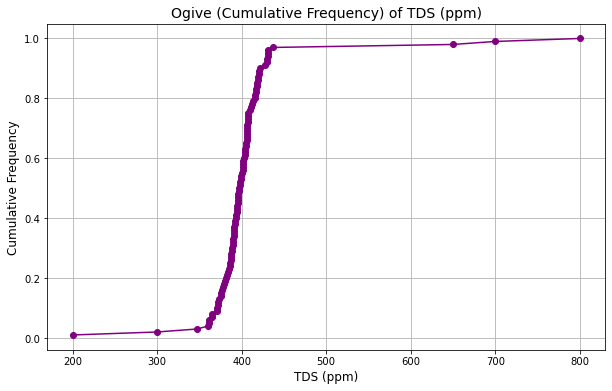

In [31]:
#Ogive (Cumulative Frequency Line Chart)
sorted_tds = np.sort(df["TDS (ppm)"])
cumulative_frequencies = np.arange(1, len(sorted_tds)+1) / len(sorted_tds)

plt.figure(figsize=(10, 6))
plt.plot(sorted_tds, cumulative_frequencies, marker='o', linestyle='-', color='purple')
plt.title('Ogive (Cumulative Frequency) of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Cumulative Frequency', fontsize=12)
plt.grid(True)
plt.show()

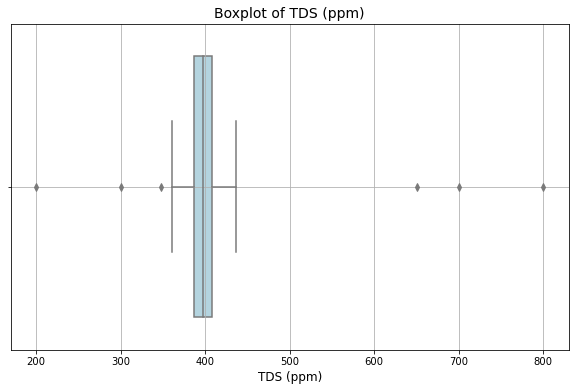

In [32]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["TDS (ppm)"], color='lightblue')
plt.title('Boxplot of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.grid(True)
plt.show()

In [33]:
df["TDS (ppm)"].mean()

404.0226729768689

In [34]:
df["TDS (ppm)"].median()

397.4608741644057

In [42]:
df.head()

,Date,TDS (ppm)
0,2024-08-22,650.000000
1,2024-08-22,397.234714
2,2024-08-22,412.953771
3,2024-08-22,430.460597
4,2024-08-22,395.316933


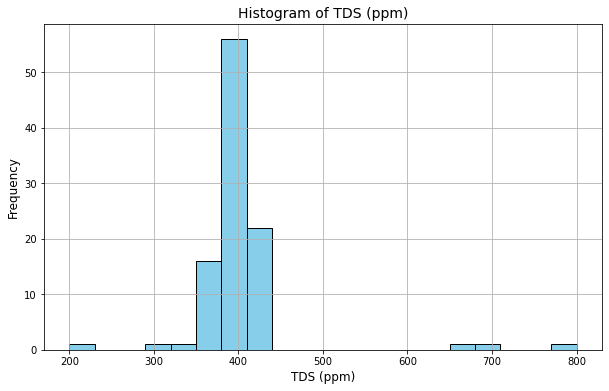

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df["TDS (ppm)"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [50]:
bins = [200,300,400,500,600,700,800,900]

frequency, class_intervals = np.histogram(df["TDS (ppm)"], bins=bins)

df2 = pd.DataFrame({
    'Class Interval': [f"{class_intervals[i]} - {class_intervals[i+1]}" for i in range(len(class_intervals)-1)],
    'Frequency': frequency
})

df2['Relative Frequency'] = df2['Frequency'] / df2['Frequency'].sum()

df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()

In [51]:
print(df2)

  Class Interval  Frequency  Relative Frequency  Cumulative Relative Frequency
0      200 - 300          1                0.01                           0.01
1      300 - 400         53                0.53                           0.54
2      400 - 500         43                0.43                           0.97
3      500 - 600          0                0.00                           0.97
4      600 - 700          1                0.01                           0.98
5      700 - 800          1                0.01                           0.99
6      800 - 900          1                0.01                           1.00


In [52]:
df2["Class Interval","Frequency"].mean()

14.285714285714286

In [55]:
df3=df2[["Class Interval","Frequency"]]

In [56]:
df3

,Class Interval,Frequency
0,200 - 300,1
1,300 - 400,53
2,400 - 500,43
3,500 - 600,0
4,600 - 700,1
5,700 - 800,1
6,800 - 900,1


In [59]:
import pandas as pd
df3.to_csv('Class_Interval.csv', index=False)

In [60]:
import pandas as pd
from IPython.display import FileLink
# Provide a download link
FileLink('Class_Interval.csv')

/Users/apple/Class_Interval.csv

In [66]:
# Class Probability :
import numpy as np

# Function to calculate the class probability for an Exponential distribution
def calculate_class_probability(lower_bound, upper_bound, sample_mean):
    # Calculate the rate parameter (lambda)
    lambda_ = 1 / sample_mean
    
    # Calculate the class probability using the formula for Exponential distribution
    class_probability = np.exp(-lambda_ * lower_bound) - np.exp(-lambda_ * upper_bound)
    return class_probability

# Input: Class interval and observed frequency
lower_bound = float(input("Enter the lower bound of the class interval: "))
upper_bound = float(input("Enter the upper bound of the class interval: "))
observed_frequency = int(input("Enter the observed frequency for this class interval: "))
sample_mean = float(input("Enter the sample mean (population mean): "))

# Calculate the class probability
class_probability = calculate_class_probability(lower_bound, upper_bound, sample_mean)

# Display the result
print(f"Class Probability for the interval {lower_bound} - {upper_bound}: {class_probability:.4f}")


Enter the lower bound of the class interval: 800
Enter the upper bound of the class interval: 900
Enter the observed frequency for this class interval: 1
Enter the sample mean (population mean): 488.55
Class Probability for the interval 800.0 - 900.0: 0.0360


# data set 2

In [72]:
d=pd.read_csv("Complex_Sales_Dataset.csv")

In [73]:
d.head()

,Date,Region,Product Category,Units Sold,Sales Amount,Profit
0,2024-01-01,East,Groceries,470.000000,16226.000000,-672.000000
1,2024-01-02,West,Electronics,97.234714,7864.124961,1277.390105
2,2024-01-03,West,Electronics,112.953771,2902.148639,1017.889111
3,2024-01-04,East,Clothing,130.460597,5844.453855,805.918967
4,2024-01-05,North,Groceries,95.316933,4024.036146,1209.466994


In [74]:
d["Profit"].describe()

count     500.000000
mean     1013.678785
std       348.138561
min      -789.000000
25%       815.201729
50%      1031.436492
75%      1223.472080
max      1780.504934
Name: Profit, dtype: float64

In [75]:
d.isnull()

,Date,Region,Product Category,Units Sold,Sales Amount,Profit
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


In [76]:
d.count()

Date                500
Region              500
Product Category    500
Units Sold          500
Sales Amount        500
Profit              500
dtype: int64

In [77]:
d.columns

Index(['Date', 'Region', 'Product Category', 'Units Sold', 'Sales Amount',
       'Profit'],
      dtype='object')

In [79]:
profit_dataset= d[["Date","Profit"]]

In [80]:
profit_dataset.to_csv('profit_dataset.csv', index=False)

In [81]:

from IPython.display import FileLink
# Provide a download link
FileLink('profit_dataset.csv')

/Users/apple/profit_dataset.csv